In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv(r'E:\Major Project\Perrin Freres monthly champagne sales millions.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns=['months','sales']
df.head()

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.drop(106,axis=0,inplace=True)

In [7]:
df.drop(105,axis=0,inplace=True)

In [8]:
df['months'] = pd.to_datetime(df['months'])

In [9]:
df.head()

,months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
df.set_index('months',inplace=True)

In [11]:
df.head()

,sales
months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [12]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='months'>

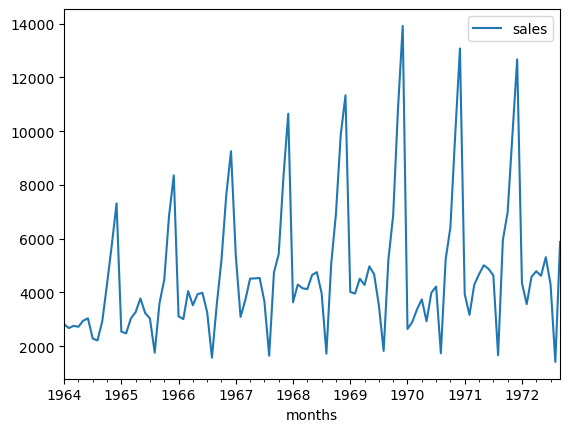

In [13]:
df.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller


In [15]:
test_result = adfuller(df['sales'])

In [16]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
            

In [17]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276204
p-value : 0.3639157716602462
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [18]:
df['Seasonal First Difference'] = df["sales"]-df['sales'].shift(12)

In [19]:
df.head(14)

,sales,Seasonal First Difference
months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='months'>

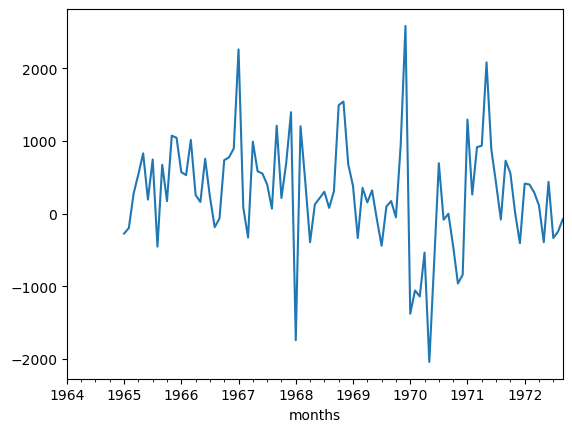

In [21]:
df['Seasonal First Difference'].plot()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

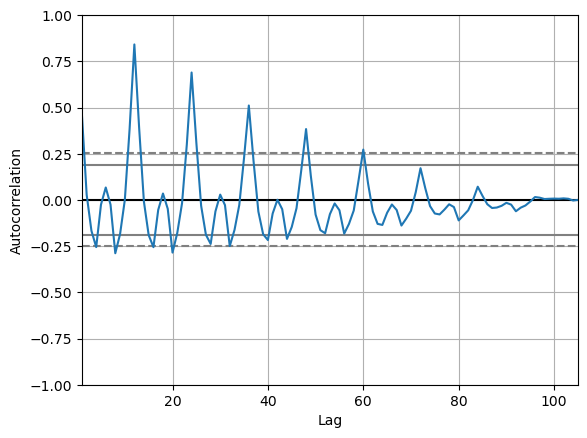

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

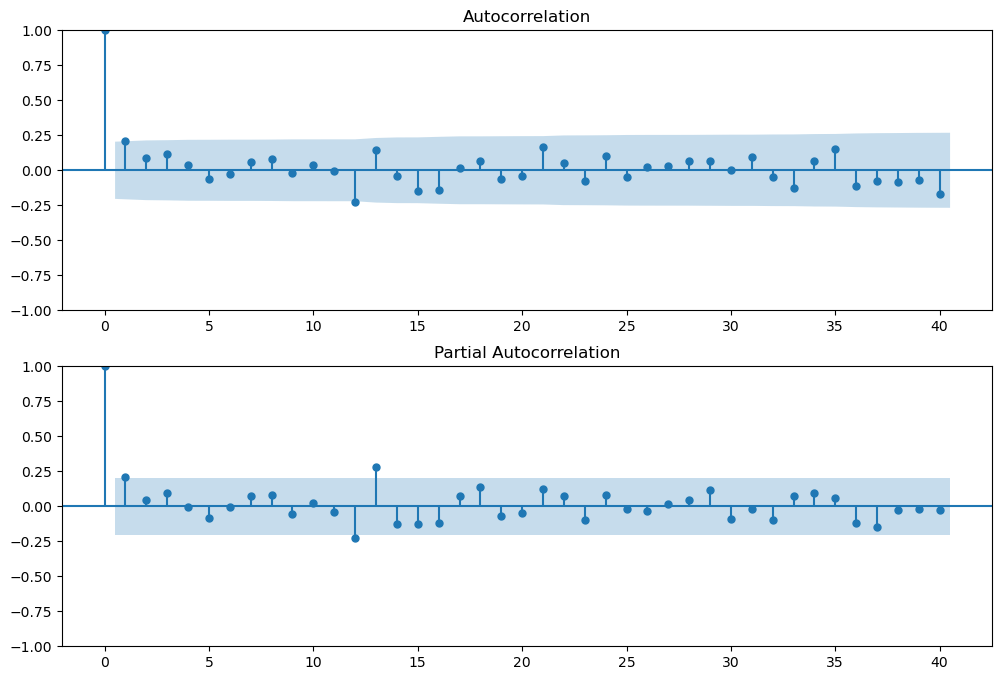

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model=ARIMA(df['sales'],order=(1,1,1))


d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
model_fit=model.fit()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 16 Feb 2025   AIC                           1911.627
Time:                        22:28:29   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.002      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.332      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='months'>

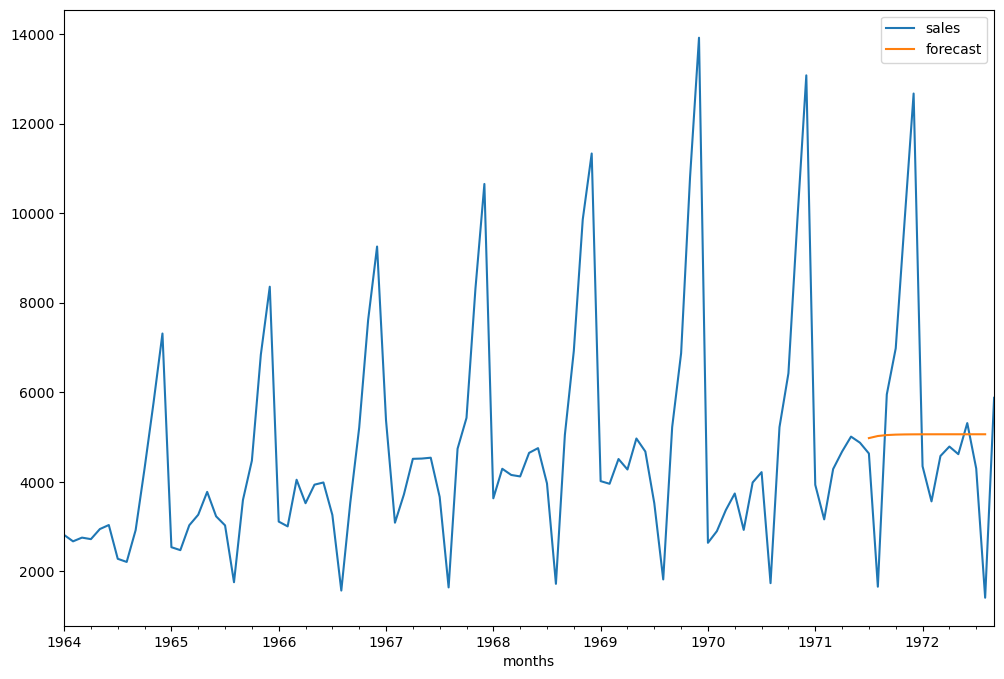

In [33]:
df['forecast'] = model_fit.predict(start = 90, end=103,dynamic = True)
df[['sales','forecast']].plot(figsize=(12,8))

In [34]:
import statsmodels.api as sm


In [36]:
model = sm.tsa.statespace.SARIMAX(df['sales'],order=(1,1,1),seasonal_order = (1,1,1,12))
results=model.fit()

d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='months'>

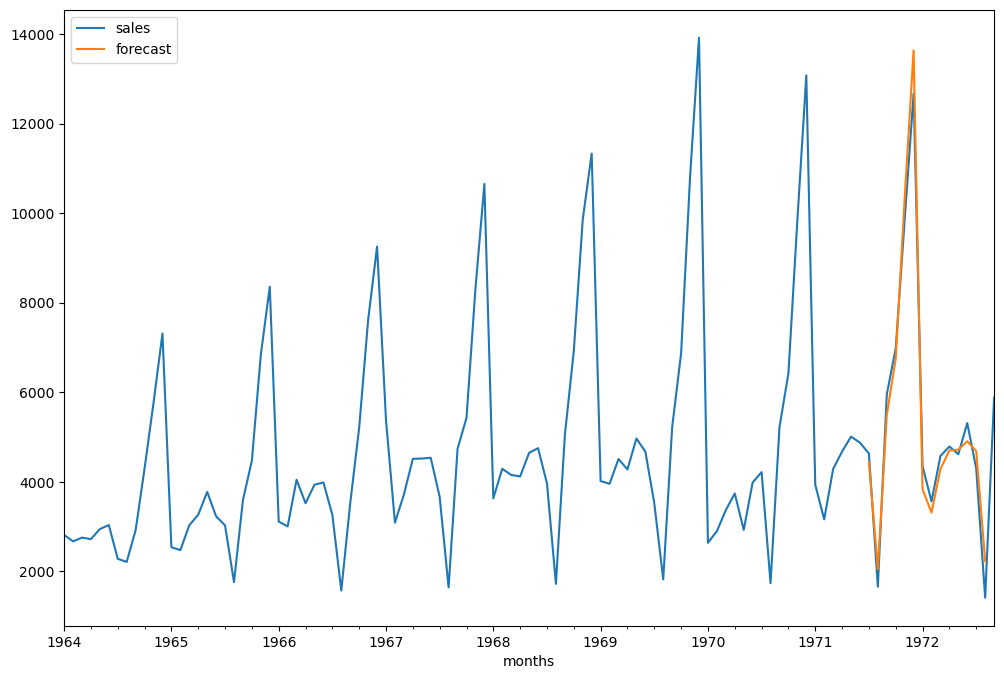

In [37]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [39]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [40]:
future_datest_df.tail()

,sales,Seasonal First Difference,forcast,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [43]:
future_df = pd.concat([df,future_datest_df])

<Axes: >

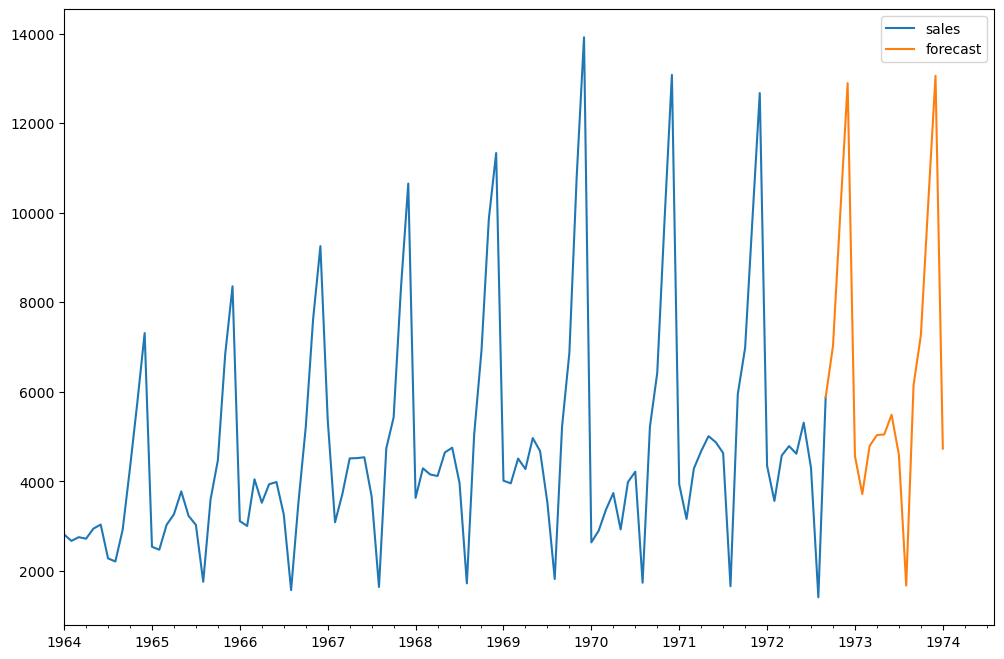

In [44]:
future_df['forecast'] = results.predict(start =104, end = 120, dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8))